<blockquote><p style="font-size:16px; color:#159364; font-family:verdana;">💬 Asking the <code>right questions</code> is the <code>half of the answers</code> 😃</p></blockquote>

***

<h2 id="heading"><span style="background-color:#a6e7f6; color:#11353e; display:fill;border-radius:5px; font-family:cursive"> 📋 Conclusion from the analysis<font style="font-family:Georgia; color:#aa0c0c;">
📌 Corr Me
</font> </span></h2>

<span style="font-family:Georgia;
             color:#ff9d91">From the Analysis Below we can see that we did deal with two major problems:👨‍💻</span>
             
* <font style="font-family:Georgia; color:#aa0c0c;">
📌 We canot use SciKit-Learn's OneHotEncoder, cause we have a Pandas data frame which contains a series of lists
</font>

* <font style="font-family:Georgia;padding: 6px;color:#174f20;">
💡 Instead, use SciKit-Learn's MultiLabelBinarizer.
</font>


<h2 id="heading"><span style="background-color:#cefffb; color:#1b4946; display:fill;border-radius:5px; font-family:cursive"> 📊🧮 Analysis </span></h2>

In [1]:
# Constante

DF_PATH = "../data/processed/1_preprocessed_df.pkl"
FIG_PATH = "../reports/figures"

***
<h3 id="heading"><span style="background-color:#cefffb; color:#1b4946 ; display:fill;border-radius:5px; font-family:cursive"> 📥 Import packages & data </span></h3>

In [14]:
# Load necessary package 
import pandas as pd
import numpy as np
import pickle
import logging
import math
import random
import os
import seaborn as sns
from pandas_profiling import ProfileReport

import plotly 
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import AgglomerativeClustering

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram



# Visualisation mathplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Sci-klearn packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 20
raw_df= pd.read_pickle(DF_PATH)

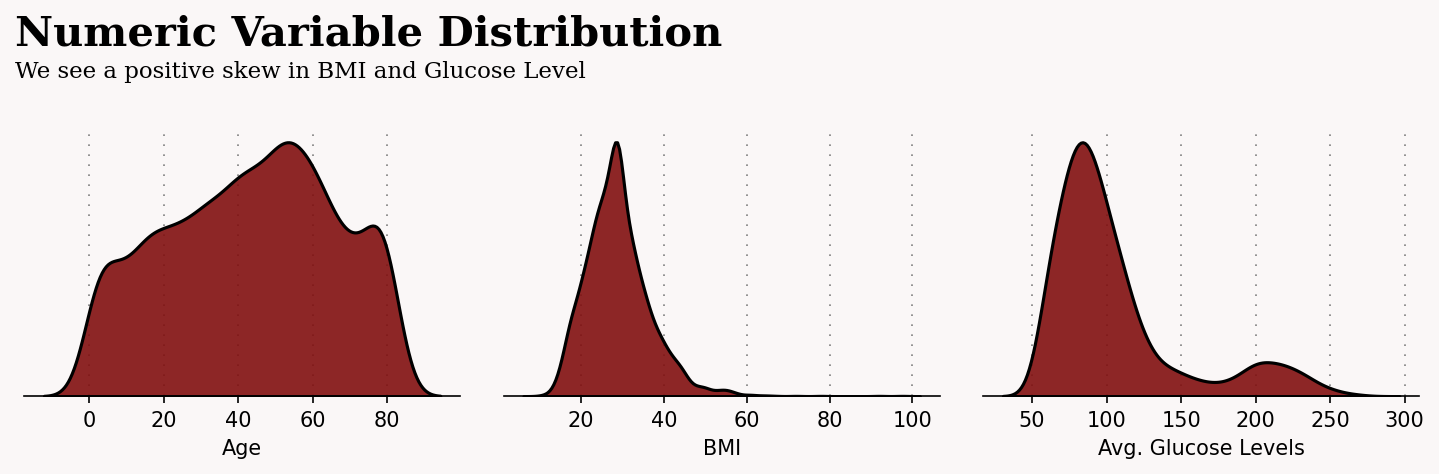

In [43]:
fig = plt.figure(figsize=(12,12), dpi=150, facecolor='#faf7f7')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)
conts = ['age','bmi','avg_glucose_level']

background_color = "#faf7f7"

plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0
for variable in conts:
        sns.kdeplot(raw_df[variable] ,ax=locals()["ax"+str(plot)], color='#810f0f', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        # locals()["ax"+str(plot)].set_xlabel(variable) #removed this for aesthetics
        plot += 1
        
ax0.set_xlabel('Age')
ax2.set_xlabel('Avg. Glucose Levels')
ax1.set_xlabel('BMI')


ax0.text(-20, 0.022, 'Numeric Variable Distribution', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-20, 0.02, 'We see a positive skew in BMI and Glucose Level', fontsize=11, fontweight='light', fontfamily='serif')
plt.show()

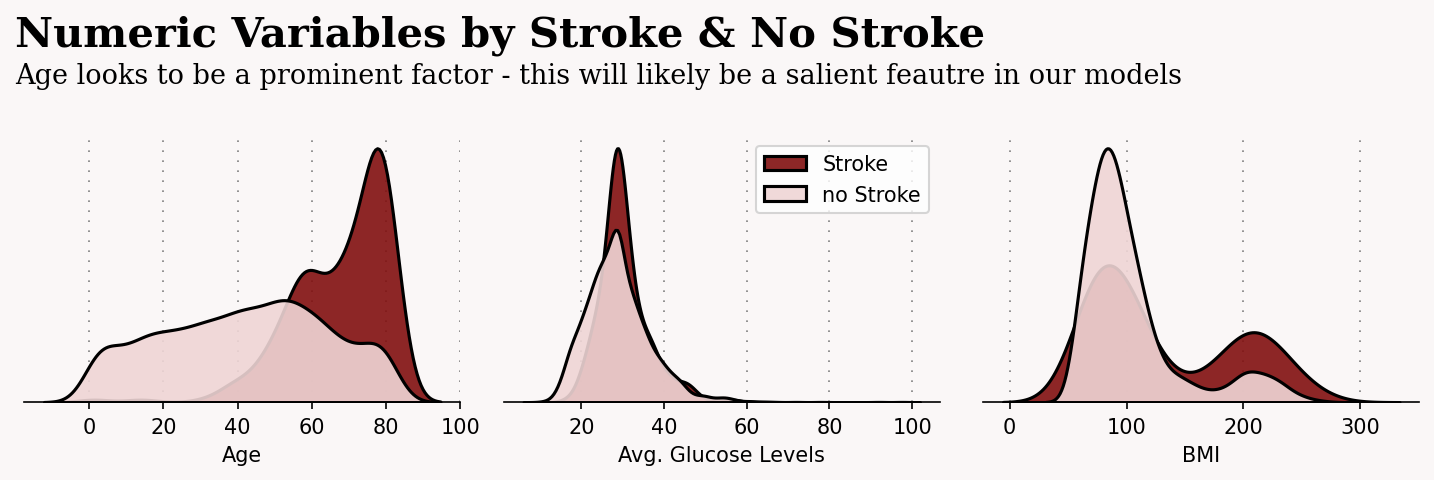

In [55]:
fig = plt.figure(figsize=(12, 12), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)


plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s = raw_df[raw_df['stroke'] == 1]
ns = raw_df[raw_df['stroke'] == 0]

for feature in conts:
        sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#810f0f', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, label="Stroke", legend=False)
        sns.kdeplot(ns[feature],ax=locals()["ax"+str(plot)], color='#efd5d5', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, label="no Stroke", legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        #locals()["ax"+str(plot)].set_xlabel(feature)
        plot += 1

ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')
ax2.legend()
        
ax0.text(-20, 0.056, 'Numeric Variables by Stroke & No Stroke', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-20, 0.05, 'Age looks to be a prominent factor - this will likely be a salient feautre in our models', 
         fontsize=13, fontweight='light', fontfamily='serif')

plt.show()

***
<h2 id="heading"><span style="background-color:#cefffb; color:#1b4946; display:fill;border-radius:5px; font-family:cursive"> 🧮 Analysis </span></h2>

<span style="font-family:Georgia;
             color:#493264">⁉️ Major question in this analysis:</span>
* General:
    - [x] Total number of passion?
    - [x] Geographical distribution?
    - [x] Missing answers?
* stroke:
    - [x] Frequency of each skill?
    - [x] How the skills are correlated with each others?
* Relation:
    - [x] How are the stroke case correlated with the feature?
    - [x] 

<h4 id="heading"><span style="background-color:#fcf3b9; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia"> 📋 Encoding the categorical data </span></h4>

<div style="font-family:Georgia;">
<p style="padding: 6px;
              color:#174f20;">
💡 We will use SciKit-Learn's OneHotEncoder.
</p>
</div>

In [ ]:
raw_df.info()

In [ ]:
CATE_COLS = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [ ]:
df = raw_df.copy()
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[CATE_COLS]))
# One-hot encoding removed index and name of columns; put it back
OH_cols.columns = OH_encoder.get_feature_names(CATE_COLS)
OH_cols.index = df.index
OH_cols

In [ ]:
# Drop the categorical columns
NUM_COLS = df.drop(CATE_COLS, axis=1)

In [ ]:
df = pd.concat([NUM_COLS, OH_cols], axis=1)
df

In [ ]:
# drop id column
df = df.drop('id', axis=1)

In [ ]:
df

### visualize the correlation between all the feature

<h4 id="heading"><span style="background-color:#fcf3b9; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia"> 📋 Features </span></h4>

In [ ]:
feature_freq = df.copy().drop(['stroke','avg_glucose_level','age','bmi'], axis=1).sum().reset_index()
feature_freq.columns = ['feature', 'freq']
# skill_freq

In [ ]:
fig = px.treemap(feature_freq, 
                 path=['feature'], 
                 color_continuous_scale='BrBg',
                 values='freq',color='freq')

fig.update_layout(width=1200, height=700)
fig.show()

fig.write_html(os.path.join(FIG_PATH, 'treemap_feature_freq.html'))

## corolation entre les columns

In [ ]:
fig = go.Figure(data=go.Heatmap(z=matrix, x=df.columns,y=df.columns, colorscale='magma', ygap=1))
fig.update_layout(height=700, width=1000)
fig.show()
fig.write_html(os.path.join(FIG_PATH, 'heatmap.html'))

# matrix = df.corr().round(2)
# fig.update_layout(width=900, height=1500, title=role)
# sns.heatmap(matrix, annot=True)
# plt.show()

In [ ]:
profile = ProfileReport(df, title="strock prediction Report details")

In [ ]:
profile.to_widgets()

In [ ]:
profile.to_notebook_iframe()

In [ ]:
fig = px.treemap(jobs_freq, 
                 path=['JobTitle'], 
                 color_continuous_scale='BrBg',
                 values='freq',color='freq')

fig.update_layout(width=1200, height=700)
fig.show()

fig.write_html(os.path.join(FIG_PATH, 'treemap_Job_freq.html'))

<h5 id="heading"><span style="background-color:#fcf3b9; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia"> 📋 Normalization</span></h5>

In [ ]:
df_corr = pd.DataFrame(matrix, columns=df.columns, index=df.columns)
std_features = StandardScaler().fit_transform(matrix)
std_features = pd.DataFrame(std_features, columns=df.columns, index=df.columns)

In [ ]:
fig = go.Figure(data=go.Heatmap(z=std_features, x=std_features.columns,y=std_features.columns, colorscale='magma', ygap=1))
fig.update_layout(width=900, height=900)
fig.show()
fig.write_html(os.path.join(FIG_PATH, 'normalized_heatmap.html'))

<h2 id="heading"><span style="background-color:#cefffb; color:#1b4946; display:fill;border-radius:5px; font-family:cursive"> Illustration Model  </span></h2>

#### Create train / test matrices 

In [ ]:
features = df.drop('stroke', axis=1).copy()
label = df['stroke']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features, label, test_size=0.3, random_state=0)

#### Compute samples weight to deal with classes imbalance 

In [ ]:
# Assign class weight as an inverse of its frequency 
class_weights = (1 / label.sum(axis=0))
class_weights
# Multiply class weights with the 1 hot encoded values and get the mean of each sample
sample_weight = np.multiply(class_weights.values, Y_train.values).sum(axis=1)

In [ ]:
Y_train.values.shape

In [ ]:
Y_train.values.shape

In [ ]:
sample_weight

#### Compute samples weight to deal with classes imbalance 

In [ ]:
def f1_from_confusion_matrix(confusion_matrix):
    return (confusion_matrix[1,1] / 
            (confusion_matrix[1,1] + 
             (0.5 * (confusion_matrix[0,1] + confusion_matrix[1,0]))
            ))

In [ ]:
feature_sets = {'original': skills_ohe.droplevel(0,axis=1).columns.tolist(), 
                'clusters': fe_clustered_skills.columns.tolist()}

In [ ]:
# multilabel_confusion_matricies

In [ ]:
results = {}

for feature_set_name, feature_set in feature_sets.items():
    # Create sub trainings
    sub_train = X_train[feature_set].copy()
    sub_test  = X_test[feature_set].copy()
    
    # Train classifier 
    clf = MultiOutputClassifier(LogisticRegression())
    clf.fit(sub_train, Y_train, sample_weight=sample_weight)

    # Calcaulte F1 for training data
    multilabel_confusion_matricies = multilabel_confusion_matrix(Y_train, clf.predict(sub_train))
    f1_train_scores = [f1_from_confusion_matrix(matrix) 
                       for matrix in multilabel_confusion_matricies]

    # Calcaulte F1 for testing data
    multilabel_confusion_matricies = multilabel_confusion_matrix(Y_test, clf.predict(sub_test))
    f1_test_scores = [f1_from_confusion_matrix(matrix) 
                       for matrix in multilabel_confusion_matricies]

    # Add to results
    set_result = pd.DataFrame({"train": f1_train_scores, "test":f1_test_scores}, 
                              index=roles_df.columns.to_list())
    results[feature_set_name] = set_result.sort_values('test')
    
    
    # Print
    print("Feature set: " + feature_set_name)
    print(".. Mean train F1:", np.mean(f1_train_scores))    
    print(".. Mean test F1:", np.mean(f1_test_scores))
    print()